#**Loan Approval Prediction System using Support Vector Machine**

> The Financial Institutions must automatically automate the loan approval process in real-time based on the information that customers provide on their online application forms. The details contain customer information such as credit history, loan amount, number of dependents, income, gender, marital status, education, and other pertinent variables. The system can determine if an individual is eligible for a loan or not by entering their details in accordance with the previously mentioned details. This model has constructed with the use of the support vector machine Classifier.













##Necessary Imports


In [ ]:
#imports necessary libraries for data analysis and machine learning tasks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

##Data Loading

In [ ]:
# Load the loan approval dataset from the CSV file into a pandas DataFrame
loan_approval_dataset = pd.read_csv('sample_data/loan_approval_dataset.csv')

In [ ]:
#Displays the first five rows of the DataFrame
loan_approval_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Data Preprocessing

In [ ]:
# Obtain the dimensions of the loan_approval_dataset DataFrame
loan_approval_dataset.shape

(614, 13)

In [ ]:
#Returns the number of non-null values for each column in the DataFrame
loan_approval_dataset.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [ ]:
# Display concise information about the DataFrame
loan_approval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Generate descriptive statistics for the DataFrame
loan_approval_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Count the total number of duplicate rows in the loan_approval_dataset
loan_approval_dataset.duplicated().sum()

0

In [ ]:
# Count the number of missing values in each column
loan_approval_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

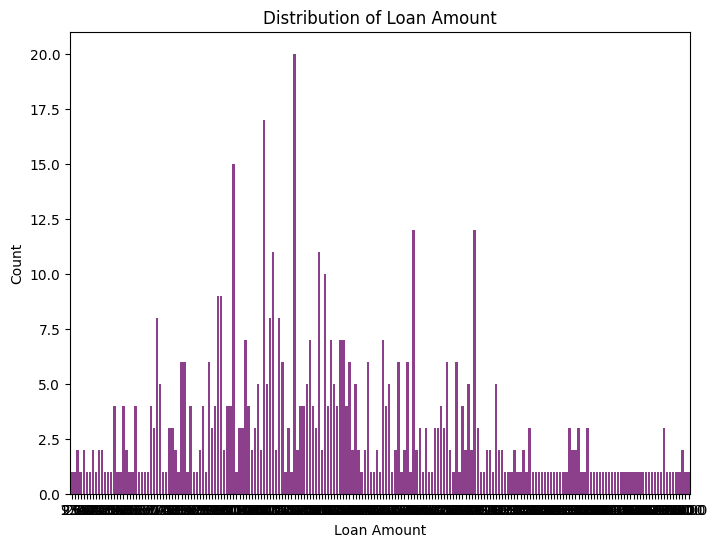

In [ ]:
# Count the occurrences of each value in the 'LoanAmount' column and create a bar plot
dependents_counts = loan_approval_dataset['LoanAmount'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=dependents_counts.index, y=dependents_counts.values,color='purple', alpha=0.8)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

Since the above distribution is more into symmetric distribution, the  null values of the LoanAmount column was replaced with the mean of that column.

In [ ]:
# Calculate the mean of the 'LoanAmount' column and replace missing values with the mean
dependents_mean = loan_approval_dataset['LoanAmount'].mean()
loan_approval_dataset['LoanAmount'].fillna(dependents_mean, inplace=True)

In [ ]:
# Count the number of missing values in each column after replacing missing values in LoanAmount column
loan_approval_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After replacing the null values of LoanAmount column, the rows which has null values in other columns expect the Loan Amount were dropped to increase the accuracy of the model instead of replacing them with mode.

In [ ]:
# Remove rows with any missing values
loan_approval_dataset = loan_approval_dataset.dropna()

In [ ]:
# Count the number of missing values in each column after dropping rows which has null values
loan_approval_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Replace the values in the 'Loan_Status' column with 0 and 1
loan_approval_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
#Displays the first five rows of the DataFrame
loan_approval_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
# Count the occurrences of each value in the 'Dependents' column
loan_approval_dataset['Dependents'].value_counts()

0     284
2      88
1      84
3+     43
Name: Dependents, dtype: int64

In [ ]:
# Replace the value '3+' with 4 in the  DataFrame
loan_approval_dataset = loan_approval_dataset.replace(to_replace='3+', value=4)

In [ ]:
# Count the occurrences of each value in the 'Dependents' column
loan_approval_dataset['Dependents'].value_counts()

0    284
2     88
1     84
4     43
Name: Dependents, dtype: int64

##Data Visualization

In [ ]:
# Set a custom color palette for Seaborn plots
custom_palette = ["purple", "green"]
sns.set_palette(custom_palette)

<Axes: xlabel='Education', ylabel='count'>

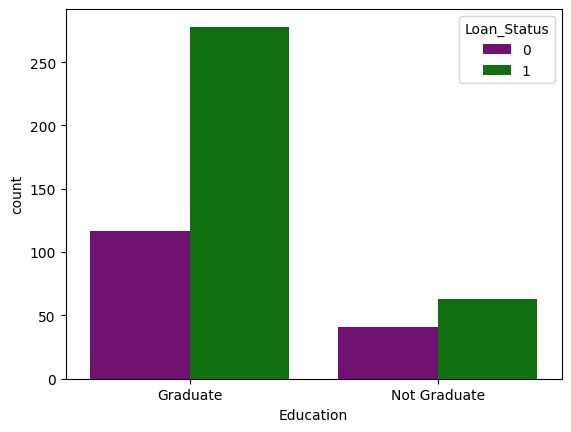

In [ ]:
# Create a count plot to visualize the distribution of loan status based on education levels
sns.countplot(x='Education',hue='Loan_Status', data=loan_approval_dataset)

<Axes: xlabel='Married', ylabel='count'>

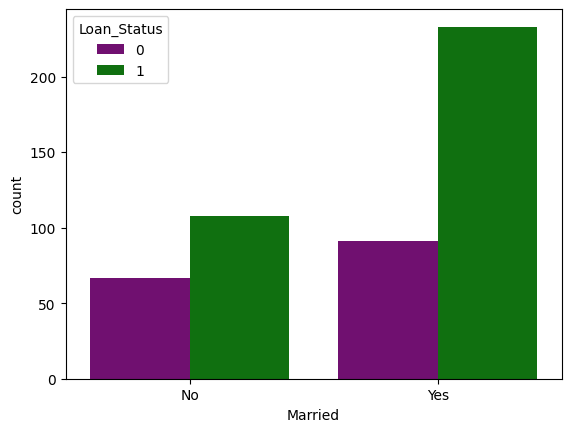

In [ ]:
# Create a count plot to visualize the distribution of loan status based on Marital Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_approval_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

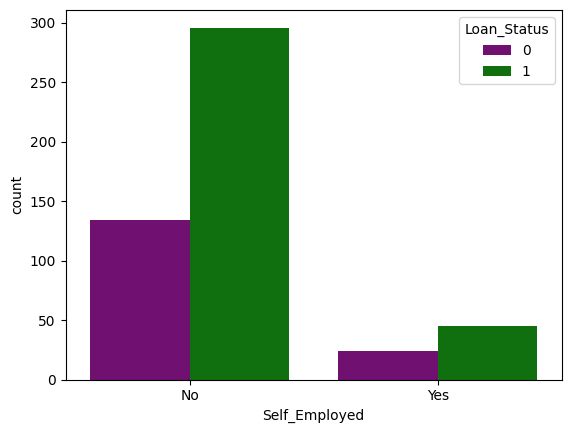

In [ ]:
# Create a count plot to visualize the distribution of loan status based on Self Employment
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_approval_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

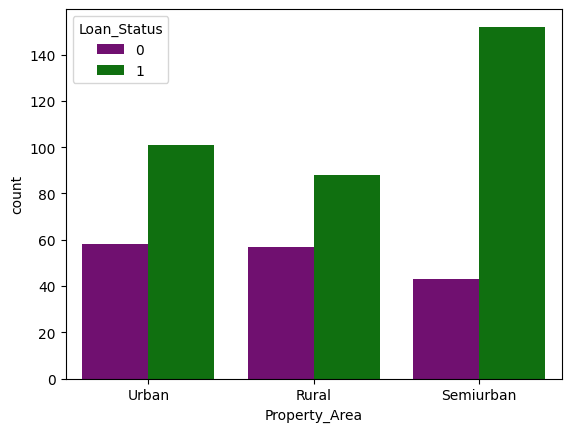

In [ ]:
# Create a count plot to visualize the distribution of loan status based on property area
sns.countplot(x='Property_Area', hue='Loan_Status',data=loan_approval_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

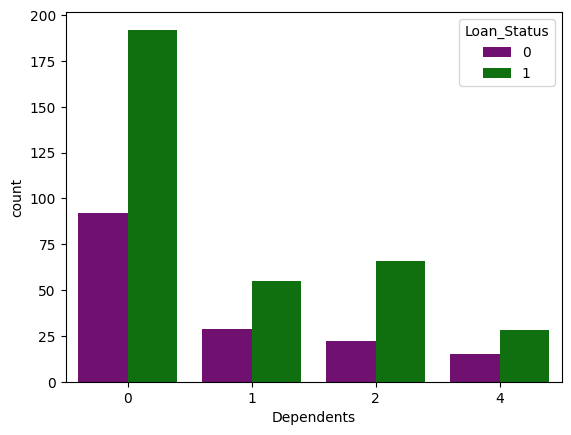

In [ ]:
# Create a count plot to visualize the distribution of loan status based on Dependents
sns.countplot(x='Dependents',hue='Loan_Status', data=loan_approval_dataset)

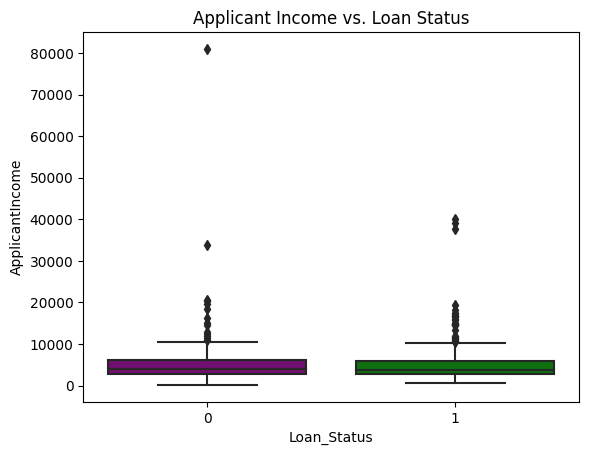

In [ ]:
# Create a box plot to visualize the relationship between loan status and applicant income
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_approval_dataset)

plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.title('Applicant Income vs. Loan Status')
plt.show()


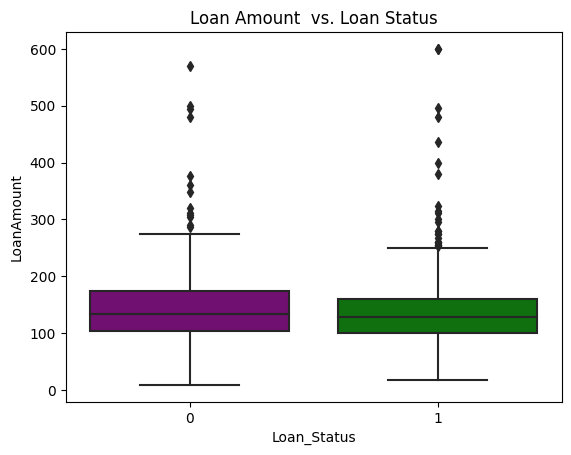

In [ ]:
# Create a box plot to visualize the relationship between loan status and Loan Amount
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_approval_dataset)

plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan Amount  vs. Loan Status')
plt.show()

In [ ]:
# Replace categorical values with numerical representations
loan_approval_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
#Displays the first five rows of the DataFrame
loan_approval_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


##Correlation Matrix

<ipython-input-100-460135bb279b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_approval_dataset.corr()


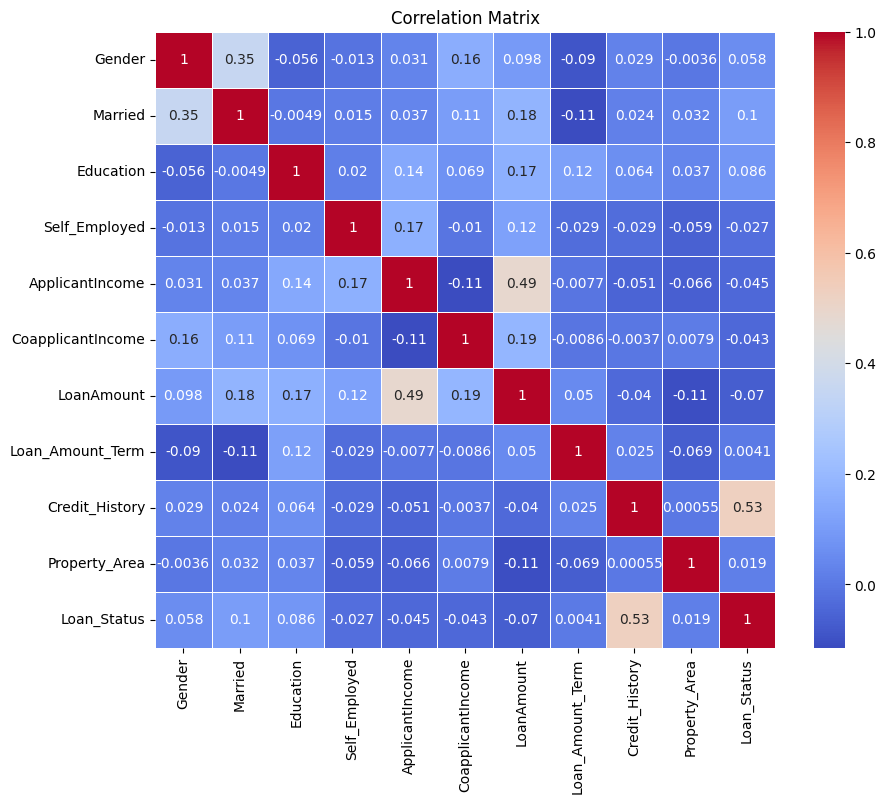

In [ ]:
# Calculate the correlation matrix and create a heatmap to visualize the correlations
correlation_matrix = loan_approval_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##Feature Selection

In [ ]:
# Separate the features and target variable
X = loan_approval_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_approval_dataset['Loan_Status']

##Data Split

In [ ]:
# Split the data into training and testing sets using a 90-10 split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
# Print the shapes of the original dataset, training set, and testing set
print(X.shape, X_train.shape, X_test.shape)

(499, 11) (449, 11) (50, 11)


##Model Training
###Suppot Vector Machine model

In [ ]:
# Create a Support Vector Machine model with a linear kernel
svm_model = svm.SVC(kernel='linear')

In [ ]:
# Train the Support Vector Machine model on the training data
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

##Model Evaluation

In [ ]:
# Predict the target variable for the test data and evaluate the model's performance
y_prediction = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction, zero_division=1))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.81      1.00      0.89        34

    accuracy                           0.84        50
   macro avg       0.90      0.75      0.78        50
weighted avg       0.87      0.84      0.82        50



##The Predictive System
This system predicts the eligibility of an applicant for receiving a loan after inputing the relevant details using ab




In [ ]:
# Create a new DataFrame 'new_data' with information for a new loan applicant
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Married': ['No'],
    'Dependents': [0],
    'Education': ['Not Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [500],
    'CoapplicantIncome': [10],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Rural']
})

# Preprocess the input data
def preprocess_data(data):
    # Replace missing values with 0
    data.fillna(0, inplace=True)
    # Replace '3+' with 4 in the 'Dependents' column
    data = data.replace(to_replace='3+', value=4)
    data.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1},
                  'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
    return data

# Preprocess the new_data DataFrame before making predictions
new_data = preprocess_data(new_data)

# Use the SVM model to predict the loan status for the new_data
predictions = svm_model.predict(new_data)

# Generate meaningful predictions based on the SVM model's output
predictions = ['This Person is eligible for a loan' if p == 1 else 'This Person is eligible for a loan' for p in predictions]

# Print the prediction
print("Loan Status Prediction:",predictions[0])

Loan Status Prediction: This Person is eligible for a loan
